## 1. Cluster Algorithms | Gaussian Mixture Models (GMM)

### 1.1. The Math

A Gaussian Mixture Model (GMM) is a probabilistic model that represents a mixture of multiple Gaussian distributions. It is used to model data that consists of multiple underlying groups, each with its own Gaussian distribution. The GMM is defined as:

\begin{equation}
p(\mathbf{x}) = \sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}|\mathbf{\mu}_k, \mathbf{\Sigma}_k)
\end{equation}

Where, $\mathbf{x}$ is the data point, $K$ is the number of Gaussian components in the mixture, and $\pi_k$, $\mathbf{\mu}_k$, and $\mathbf{\Sigma}_k$ are the mixing coefficient (also known as the weight or prior probability), mean vector, and covariance matrix of the $k$-th Gaussian component, respectively. The Gaussian distribution is represented by $\mathcal{N}$:

\begin{equation}
\mathcal{N}(\mathbf{x}|\mathbf{\mu}_k, \mathbf{\Sigma}_k) = \frac{1}{(2\pi)^{D/2}|\mathbf{\Sigma}_k|^{1/2}}\exp\left(-\frac{1}{2}(\mathbf{x}-\mathbf{\mu}_k)^T\mathbf{\Sigma}_k^{-1}(\mathbf{x}-\mathbf{\mu}_k)\right)
\end{equation}

$D$ is the dimension of the data points. The mixing coefficients satisfy the following constraints:

\begin{equation}
\sum_{k=1}^K \pi_k = 1, \quad \pi_k \ge 0
\end{equation}

The parameters of the GMM can be estimated using the Expectation-Maximization (EM) algorithm, which is an iterative procedure that alternates between two steps:

1. Expectation (E) step: Compute the posterior probabilities of each data point belonging to each Gaussian component:
\begin{equation}
w_{nk} = \frac{\pi_k \mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_k, \mathbf{\Sigma}k)}{\sum{j=1}^K \pi_j \mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_j, \mathbf{\Sigma}_j)}
\end{equation}

2. Maximization (M) step: Update the parameters of each Gaussian component by maximizing the log-likelihood using the posterior probabilities computed in the E-step:
\begin{align}
\pi_k &= \frac{1}{N} \sum_{n=1}^N w_{nk} \
\mathbf{\mu}k &= \frac{\sum{n=1}^N w_{nk} \mathbf{x}n}{\sum{n=1}^N w_{nk}} \
\mathbf{\Sigma}k &= \frac{\sum{n=1}^N w_{nk} (\mathbf{x}_n - \mathbf{\mu}_k)(\mathbf{x}n - \mathbf{\mu}k)^T}{\sum{n=1}^N w{nk}}
\end{align}

$N$ is the number of data points. The EM algorithm converges to a local maximum of the log-likelihood function. The log-likelihood function is given by:

\begin{equation}
\mathcal{L}(\mathbf{\theta}) = \sum_{n=1}^N \log \left(\sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_k, \mathbf{\Sigma}_k)\right)
\end{equation}

where 
\begin{equation}
\mathbf{\theta} = \{\pi_k, \mathbf{\mu}_k, \mathbf{\Sigma}_k\}_{k=1}^K
\end{equation}

### 1.2. ELI5

Looking at the math, it's easy to get lost in the notation, and it may not be immediately intuitive how GMMs work. The best way to explain GMMs is to walk through an simple example. Suppose we have dataset representing the ages of people in a small town:

```python
ages = [18, 25, 57, 60, 36, 64, 37, 40, 24]
```
Looking at the data, we suspect that the ages in this dataset represent 3 distinct age groups: young, middle age and old people. We can use a GMM to model this data and identify the 3 age groups. We don't the exact mean or the variance of the age groups, but we can make an educated guess based on the data. For example, we can assume that the young age group has a mean of 25 and a variance of 10, the middle age group has a mean of 40 and a variance of 10, and the old age group has a mean of 60 and a variance of 10. We can also assume that the data is equally distributed among the 3 age groups, so we can set the mixing coefficients to 1/3 for each age group. We can now use the EM algorithm to estimate the parameters of the GMM:

```python
Gaussian distribution 1 | mu1 = 24, var1 = 10
Gaussian distribution 2 | mu2 = 37, var2 = 10
Gaussian distribution 3 | mu3 = 60, var3 = 10
```

##### 1. Expectation (E) step:

For each age value, we can calculate the probability of that age value belonging to each Gaussian distribution. Let's use the age value 25 as an example. First, we calculate the unnormalized probabilities using the Gaussian function with the current parameters:

```python
P(Gaussian 1 | Age 25) = Gaussian(25 | Mean=24, Variance=10)
P(Gaussian 2 | Age 25) = Gaussian(25 | Mean=37, Variance=10)
P(Gaussian 3 | Age 25) = Gaussian(25 | Mean=60, Variance=10)
```
We can plug the values into the Gaussian function to get the unnormalized probabilities:

```python
Gaussian(x | Mean, Variance) = (1 / sqrt(2 * pi * Variance)) * exp(-((x - Mean)^2) / (2 * Variance))
```
We'll write the Gaussian function in Python as follows:

```python
def gaussian(x, mean, variance): # x is the age value, mean is the mean of the Gaussian distribution, and variance is the variance of the Gaussian distribution
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((x - mean)**2) / (2 * variance))
```
We can apply this function to each age value in the dataset, to obtain a set of probabilities for each data point belonging to each Gaussian distribution after which we normalize the probabilities to obtain the posterior probabilities:

```python
results_dict = {}

for age in ages:
    for mean in [mean_1, mean_2, mean_3]:
        # print(f'P(age = {age} | mean = {mean}) = {gaussian(age, mean, variance_1):0.2f}')
        results_dict[age] = [gaussian(age, mean, variance_1) for mean in [mean_1, mean_2, mean_3]]
        # Normalize the probabilities
        results_dict[age] = results_dict[age] / np.sum(results_dict[age])

# Convert the dictionary to a dataframe
results_df = pd.DataFrame(results_dict).T.rename(columns={0: 'P(Gaussian 1)', 1: 'P(Gaussian 2)', 2: 'P(Gaussian 3)'})
results_df
```

We repeat this process for each age value in the dataset, obtaining a set of probabilities for each data point belonging to each Gaussian distribution after which we normalize the probabilities to obtain the posterior probabilities:

|   Age |   P(Gaussian 1) |   P(Gaussian 2) |   P(Gaussian 3) |
|------:|----------------:|----------------:|----------------:|
|    18 |     1           |     1.03027e-08 |     3.1137e-39  |
|    25 |     0.99953     |     0.000469738 |     1.10699e-27 |
|    57 |     1.41503e-26 |     1.32311e-08 |     1           |
|    60 |     1.58601e-31 |     1.47197e-11 |     1           |
|    36 |     0.000101495 |     0.999899    |     1.59393e-13 |
|    64 |     3.97828e-38 |     1.69681e-15 |     1           |
|    37 |     2.19226e-05 |     0.999978    |     1.53841e-12 |
|    40 |     2.20872e-07 |     1           |     1.38286e-09 |
|    24 |     0.999899    |     0.000101491 |     2.47827e-29 |


##### 2. Maximization (M) step:

After computing the probabilities in the E-step, we can use them to update the parameters of the GMM. We can use the probabilities to compute the new mixing coefficients (or weights) and the new parameters of each Gaussian distribution (i.e. the mean and variance of each Gaussian distribution). For example, we can compute the new mean of the first Gaussian distribution as follows:

```python
New Mean j ≈ Σ(P(Gaussian j | Data i) * Data i) / Σ(P(Gaussian j | Data i))
New Variance j ≈ Σ(P(Gaussian j | Data i) * (Data i - New Mean j)^2) / Σ(P(Gaussian j | Data i))

where:
j represents the index of the Gaussian distribution (e.g., 1, 2, or 3 in a 3-component GMM).
i represents the index of the data point in the dataset.
P(Gaussian j | Data i) is the probability of data point i belonging to Gaussian distribution j calculated during the E step.
Data i is the value of data point i in the dataset.
```
Again, we can write a function to compute the new mean and variance of each Gaussian distribution:

```python
def new_mean(p_gaussian, age, mean):
    return np.sum(p_gaussian * age) / np.sum(p_gaussian)

def new_variance(p_gaussian, age, mean):
    return np.sum(p_gaussian * (age - mean)**2) / np.sum(p_gaussian)
```

We can use this function to compute the new mean and variance of each Gaussian distribution:

```python
# Calculate the new mean and variance of the first Gaussian distribution
for mean in [mean_1, mean_2, mean_3]:
    new_mean_1, new_variance_1 = update_parameters(ages, results_df['P(Gaussian 1)'])
    print(f'New mean of Gaussian 1: {new_mean_1:0.2f}')
    print(f'New variance of Gaussian 1: {new_variance_1:0.2f}')
```
|            |   Old Mean |   New Mean |   Old Variance |   New Variance |
|:-----------|-----------:|-----------:|---------------:|---------------:|
| Gaussian 1 |         24 |    22.3372 |             10 |        9.61808 |
| Gaussian 2 |         37 |    37.6629 |             10 |        2.94338 |
| Gaussian 3 |         60 |    60.3333 |             10 |        8.22222 |


We would repeat these two steps (expectation and maximization steps) until the parameters converge or a stopping criterion is met, such as a maximum number of iterations or when we observe minimum change in the parameters.


### 1.3. Implementing the EM algorithm with scikit-learn





In [3]:
import pandas as pd
import numpy as np

# Limiting floats output to 5 decimal points
pd.options.display.float_format = '{:,.5f}'.format


ages = [18, 25, 57, 60, 36, 64, 37, 40, 24]

mean_1 = 24
mean_2 = 37
mean_3 = 60

variance_1 = 10
variance_2 = 10
variance_3 = 10


def gaussian(x, mean, variance):
    return 1 / np.sqrt(2 * np.pi * variance) * np.exp(- (x - mean) ** 2 / (2 * variance))

p_gaussian1 = gaussian(25, mean_1, variance_1)
p_gaussian2 = gaussian(25, mean_2, variance_2)
p_gaussian3 = gaussian(25, mean_3, variance_3)

print(f'The unnormalized probabilities are {p_gaussian1:0f}, {p_gaussian2:0f}, {p_gaussian3:0f}')

# Let's normalize the probabilities so that they sum to 1
p_gaussian1 = p_gaussian1 / (p_gaussian1 + p_gaussian2 + p_gaussian3)
p_gaussian2 = p_gaussian2 / (p_gaussian1 + p_gaussian2 + p_gaussian3)
p_gaussian3 = p_gaussian3 / (p_gaussian1 + p_gaussian2 + p_gaussian3)

print(f'The normalized probabilities are {p_gaussian1:0f}, {p_gaussian2:0f}, {p_gaussian3:0f}')



The unnormalized probabilities are 0.120004, 0.000094, 0.000000
The normalized probabilities are 0.999216, 0.000094, 0.000000


In [6]:
# We can repeat the same process for the other ages
results_dict = {}

for age in ages:
    for mean in [mean_1, mean_2, mean_3]:
        # print(f'P(age = {age} | mean = {mean}) = {gaussian(age, mean, variance_1):0.2f}')
        results_dict[age] = [gaussian(age, mean, variance_1) for mean in [mean_1, mean_2, mean_3]]
        # Normalize the probabilities
        results_dict[age] = results_dict[age] / np.sum(results_dict[age])
        
results_dict

# Convert the dictionary to a dataframe
results_df = pd.DataFrame(results_dict).T.rename(columns={0: 'P(Gaussian 1)', 1: 'P(Gaussian 2)', 2: 'P(Gaussian 3)'})
results_df

,P(Gaussian 1),P(Gaussian 2),P(Gaussian 3)
18,1.00000,0.00000,0.00000
25,0.99922,0.00078,0.00000
57,0.00000,0.00000,1.00000
60,0.00000,0.00000,1.00000
36,0.00078,0.99922,0.00000
64,0.00000,0.00000,1.00000
37,0.00021,0.99979,0.00000
40,0.00000,1.00000,0.00000
24,0.99979,0.00021,0.00000


In [7]:
print(results_df.to_markdown(index=False))

|   P(Gaussian 1) |   P(Gaussian 2) |   P(Gaussian 3) |
|----------------:|----------------:|----------------:|
|     1           |     8.76425e-08 |     2.99886e-38 |
|     0.999216    |     0.000784249 |     2.63534e-27 |
|     3.53263e-24 |     3.23253e-09 |     1           |
|     7.20639e-29 |     3.2577e-12  |     1           |
|     0.000784249 |     0.999216    |     3.26357e-13 |
|     4.01677e-35 |     3.29156e-16 |     1           |
|     0.000213855 |     0.999786    |     3.257e-12   |
|     4.32973e-06 |     0.999996    |     3.23252e-09 |
|     0.999786    |     0.000213855 |     7.20485e-29 |


In [12]:
# Now that we have the probabilities, we can use them to update our prior parameters, i.e. the means and variances
# New Mean 1 ≈ Σ(P(Gaussian 1 | Age i) * Age i) / Σ(P(Gaussian 1 | Age i))
# New Mean 2 ≈ Σ(P(Gaussian 2 | Age i) * Age i) / Σ(P(Gaussian 2 | Age i))
# New Mean 3 ≈ Σ(P(Gaussian 3 | Age i) * Age i) / Σ(P(Gaussian 3 | Age i))

# For example, the new mean for Gaussian 1 is
new_mean_1 = (18*results_df['P(Gaussian 1)'][18] + 25*results_df['P(Gaussian 1)'][25] + 57*results_df['P(Gaussian 1)'][57] + 60*results_df['P(Gaussian 1)'][60] + 36*results_df['P(Gaussian 1)'][36] + 64*results_df['P(Gaussian 1)'][64] + 37*results_df['P(Gaussian 1)'][37] + 40*results_df['P(Gaussian 1)'][40] + 24*results_df['P(Gaussian 1)'][24]) / (results_df['P(Gaussian 1)'][18] + results_df['P(Gaussian 1)'][25] + results_df['P(Gaussian 1)'][57] + results_df['P(Gaussian 1)'][60] + results_df['P(Gaussian 1)'][36] + results_df['P(Gaussian 1)'][64] + results_df['P(Gaussian 1)'][37] + results_df['P(Gaussian 1)'][40] + results_df['P(Gaussian 1)'][24])
new_mean_2 = (18*results_df['P(Gaussian 2)'][18] + 25*results_df['P(Gaussian 2)'][25] + 57*results_df['P(Gaussian 2)'][57] + 60*results_df['P(Gaussian 2)'][60] + 36*results_df['P(Gaussian 2)'][36] + 64*results_df['P(Gaussian 2)'][64] + 37*results_df['P(Gaussian 2)'][37] + 40*results_df['P(Gaussian 2)'][40] + 24*results_df['P(Gaussian 2)'][24]) / (results_df['P(Gaussian 2)'][18] + results_df['P(Gaussian 2)'][25] + results_df['P(Gaussian 2)'][57] + results_df['P(Gaussian 2)'][60] + results_df['P(Gaussian 2)'][36] + results_df['P(Gaussian 2)'][64] + results_df['P(Gaussian 2)'][37] + results_df['P(Gaussian 2)'][40] + results_df['P(Gaussian 2)'][24])
new_mean_3 = (18*results_df['P(Gaussian 3)'][18] + 25*results_df['P(Gaussian 3)'][25] + 57*results_df['P(Gaussian 3)'][57] + 60*results_df['P(Gaussian 3)'][60] + 36*results_df['P(Gaussian 3)'][36] + 64*results_df['P(Gaussian 3)'][64] + 37*results_df['P(Gaussian 3)'][37] + 40*results_df['P(Gaussian 3)'][40] + 24*results_df['P(Gaussian 3)'][24]) / (results_df['P(Gaussian 3)'][18] + results_df['P(Gaussian 3)'][25] + results_df['P(Gaussian 3)'][57] + results_df['P(Gaussian 3)'][60] + results_df['P(Gaussian 3)'][36] + results_df['P(Gaussian 3)'][64] + results_df['P(Gaussian 3)'][37] + results_df['P(Gaussian 3)'][40] + results_df['P(Gaussian 3)'][24])
print(f'The new means are {new_mean_1:0f}, {new_mean_2:0f}, {new_mean_3:0f}')


# New variance 1 ≈ Σ(P(Gaussian 1 | Age i) * (Age i - Mean 1)^2) / Σ(P(Gaussian 1 | Age i))
# New variance 2 ≈ Σ(P(Gaussian 2 | Age i) * (Age i - Mean 2)^2) / Σ(P(Gaussian 2 | Age i))
# New variance 3 ≈ Σ(P(Gaussian 3 | Age i) * (Age i - Mean 3)^2) / Σ(P(Gaussian 3 | Age i))

# new_variance_1 = (results_df['P(Gaussian 1)'][18] * (18 - new_mean_1)**2 + results_df['P(Gaussian 1)'][25] * (25 - new_mean_1)**2 + results_df['P(Gaussian 1)'][57] * (57 - new_mean_1)**2 + results_df['P(Gaussian 1)'][60] * (60 - new_mean_1)**2 + results_df['P(Gaussian 1)'][36] * (36 - new_mean_1)**2 + results_df['P(Gaussian 1)'][64] * (64 - new_mean_1)**2 + results_df['P(Gaussian 1)'][37] * (37 - new_mean_1)**2 + results_df['P(Gaussian 1)'][40] * (40 - new_mean_1)**2 + results_df['P(Gaussian 1)'][24] * (24 - new_mean_1)**2) / (results_df['P(Gaussian 1)'][18] + results_df['P(Gaussian 1)'][25] + results_df['P(Gaussian 1)'][57] + results_df['P(Gaussian 1)'][60] + results_df['P(Gaussian 1)'][36] + results_df['P(Gaussian 1)'][64] + results_df['P(Gaussian 1)'][37] + results_df['P(Gaussian 1)'][40] + results_df['P(Gaussian 1)'][24])
# new_variance_2 = (results_df['P(Gaussian 2)'][18] * (18 - new_mean_2)**2 + results_df['P(Gaussian 2)'][25] * (25 - new_mean_2)**2 + results_df['P(Gaussian 2)'][57] * (57 - new_mean_2)**2 + results_df['P(Gaussian 2)'][60] * (60 - new_mean_2)**2 + results_df['P(Gaussian 2)'][36] * (36 - new_mean_2)**2 + results_df['P(Gaussian 2)'][64] * (64 - new_mean_2)**2 + results_df['P(Gaussian 2)'][37] * (37 - new_mean_2)**2 + results_df['P(Gaussian 2)'][40] * (40 - new_mean_2)**2 + results_df['P(Gaussian 2)'][24] * (24 - new_mean_2)**2) / (results_df['P(Gaussian 2)'][18] + results_df['P(Gaussian 2)'][25] + results_df['P(Gaussian 2)'][57] + results_df['P(Gaussian 2)'][60] + results_df['P(Gaussian 2)'][36] + results_df['P(Gaussian 2)'][64] + results_df['P(Gaussian 2)'][37] + results_df['P(Gaussian 2)'][40] + results_df['P(Gaussian 2)'][24])
# new_variance_3 = (results_df['P(Gaussian 3)'][18] * (18 - new_mean_3)**2 + results_df['P(Gaussian 3)'][25] * (25 - new_mean_3)**2 + results_df['P(Gaussian 3)'][57] * (57 - new_mean_3)**2 + results_df['P(Gaussian 3)'][60] * (60 - new_mean_3)**2 + results_df['P(Gaussian 3)'][36] * (36 - new_mean_3)**2 + results_df['P(Gaussian 3)'][64] * (64 - new_mean_3)**2 + results_df['P(Gaussian 3)'][37] * (37 - new_mean_3)**2 + results_df['P(Gaussian 3)'][40] * (40 - new_mean_3)**2 + results_df['P(Gaussian 3)'][24] * (24 - new_mean_3)**2) / (results_df['P(Gaussian 3)'][18] + results_df['P(Gaussian 3)'][25] + results_df['P(Gaussian 3)'][57] + results_df['P(Gaussian 3)'][60] + results_df['P(Gaussian 3)'][36] + results_df['P(Gaussian 3)'][64] + results_df['P(Gaussian 3)'][37] + results_df['P(Gaussian 3)'][40] + results_df['P(Gaussian 3)'][24])
# print(f'The new variances are {new_variance_1:0f}, {new_variance_2:0f}, {new_variance_3:0f}')
# Function to calculate the new mean

#

def new_mean(p_gaussian, age, mean):
    return np.sum(p_gaussian * age) / np.sum(p_gaussian)

def new_variance(p_gaussian, age, mean):
    return np.sum(p_gaussian * (age - mean)**2) / np.sum(p_gaussian)


# for age in ages:
#     mean_1 = new_mean(results_df['P(Gaussian 1)'], results_df.index, mean_1)
#     mean_2 = new_mean(results_df['P(Gaussian 2)'], results_df.index, mean_2)
#     mean_3 = new_mean(results_df['P(Gaussian 3)'], results_df.index, mean_3)

The new means are 22.337161, 37.662860, 60.333333


In [13]:
new_mean_1 = new_mean(results_df['P(Gaussian 1)'], results_df.index, mean_1)
new_mean_2 = new_mean(results_df['P(Gaussian 2)'], results_df.index, mean_2)
new_mean_3 = new_mean(results_df['P(Gaussian 3)'], results_df.index, mean_3)
print(f'The new means are {new_mean_1:0f}, {new_mean_2:0f}, {new_mean_3:0f}')


new_var1 = new_variance(results_df['P(Gaussian 1)'], results_df.index, new_mean_1)
new_var2 = new_variance(results_df['P(Gaussian 2)'], results_df.index, new_mean_2)
new_var3 = new_variance(results_df['P(Gaussian 3)'], results_df.index, new_mean_3)
print(f'The new variances are {new_var1:0f}, {new_var2:0f}, {new_var3:0f}')

The new means are 22.337161, 37.662860, 60.333333
The new variances are 9.618081, 2.943382, 8.222223


In [15]:
# Old and new means and variances as a dataframe
results = pd.DataFrame({'Old Mean': [mean_1, mean_2, mean_3], 'New Mean': [new_mean_1, new_mean_2, new_mean_3], 'Old Variance': [variance_1, variance_2, variance_3], 'New Variance': [new_var1, new_var2, new_var3]}, index=['Gaussian 1', 'Gaussian 2', 'Gaussian 3'])
print(results.to_markdown())

|            |   Old Mean |   New Mean |   Old Variance |   New Variance |
|:-----------|-----------:|-----------:|---------------:|---------------:|
| Gaussian 1 |         24 |    22.3372 |             10 |        9.61808 |
| Gaussian 2 |         37 |    37.6629 |             10 |        2.94338 |
| Gaussian 3 |         60 |    60.3333 |             10 |        8.22222 |


[0.33333985 0.33333333 0.33332681]
[[22.33360332]
 [60.33333333]
 [37.66669654]]
[[[9.55909989]]

 [[8.22222322]]

 [[2.88889796]]]
True
2


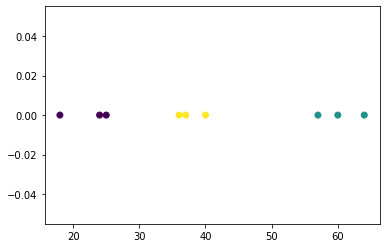

In [31]:
# Implementing the GMM with sklearn
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

ages = np.array([18, 25, 57, 60, 36, 64, 37, 40, 24])
# Create a GaussianMixture instance with 3 components
gmm = GaussianMixture(n_components=3)
# Fit the model to the data
gmm.fit(ages.reshape(-1, 1))

# Print the weights and means
print(gmm.weights_)
print(gmm.means_)
print(gmm.covariances_)
print(gmm.converged_)
print(gmm.n_iter_)

# Plot the scatter plot clustered by the GMM

plt.scatter(ages, np.zeros_like(ages), c=gmm.predict(ages.reshape(-1, 1)))


## 1. Clustering Algorithms: K-Means Clustering and Gaussian Mixture Models

**Introduction** | 



/Users/rogerlefort/miniforge3/envs/ds_concepts/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


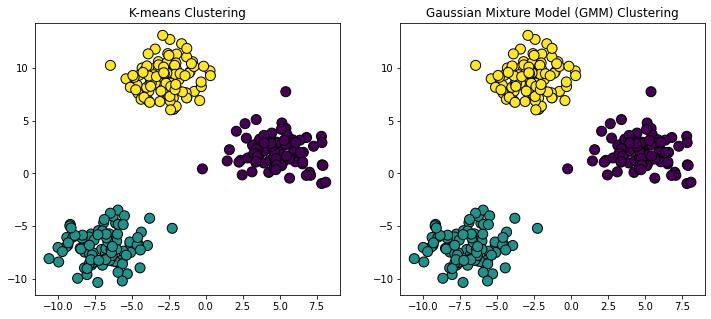

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Generate synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Apply Gaussian Mixture Model (GMM) clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X)

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=100)
ax1.set_title("K-means Clustering")

ax2.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k', s=100)
ax2.set_title("Gaussian Mixture Model (GMM) Clustering")

plt.show()


23-Mar-2023 23:08:41 INFO GEOparse - Parsing ./GSE45827_family.soft.gz: 
23-Mar-2023 23:08:41 DEBUG GEOparse - DATABASE: GeoMiame
23-Mar-2023 23:08:41 DEBUG GEOparse - SERIES: GSE45827
23-Mar-2023 23:08:41 DEBUG GEOparse - PLATFORM: GPL570
/Users/rogerlefort/miniforge3/envs/ds_concepts/lib/python3.10/site-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
23-Mar-2023 23:08:42 DEBUG GEOparse - SAMPLE: GSM1116084
23-Mar-2023 23:08:42 DEBUG GEOparse - SAMPLE: GSM1116085
23-Mar-2023 23:08:42 DEBUG GEOparse - SAMPLE: GSM1116086
23-Mar-2023 23:08:42 DEBUG GEOparse - SAMPLE: GSM1116087
23-Mar-2023 23:08:42 DEBUG GEOparse - SAMPLE: GSM1116088
23-Mar-2023 23:08:42 DEBUG GEOparse - SAMPLE: GSM1116089
23-Mar-2023 23:08:42 DEBUG GEOparse - SAMPLE: GSM1116090
23-Mar-2023 23:08:42 DEBUG GEOparse - SAMPLE: GSM1116091
23-Mar-2023 23:08:42 DEBUG GEOparse - SAMP

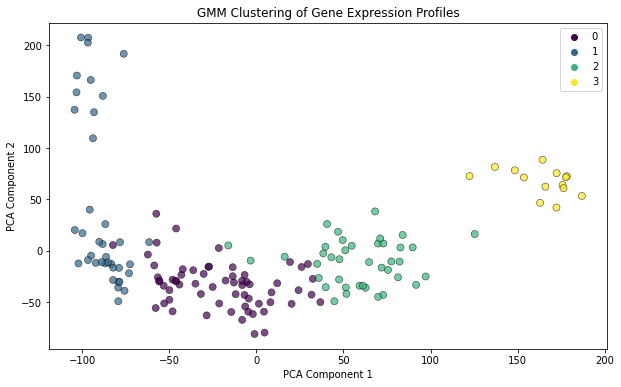

           gene  label
0    GSM1116084      2
1    GSM1116085      2
2    GSM1116086      0
3    GSM1116087      2
4    GSM1116088      0
..          ...    ...
150  GSM1116234      1
151  GSM1116235      1
152  GSM1116236      0
153  GSM1116237      0
154  GSM1116238      0

[155 rows x 2 columns]


In [18]:
import GEOparse
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt

# Download the dataset using GEOparse
# gse = GEOparse.get_GEO(geo="GSE45827", destdir="./")
# Getting locally saved dataset
gse = GEOparse.get_GEO(filepath="./GSE45827_family.soft.gz")

# Load and preprocess the data
geo_data = gse.pivot_samples("VALUE")
# log2_data = np.log2(geo_data + 1)
# scaled_data = (log2_data - log2_data.mean(axis=0)) / log2_data.std(axis=0)
# scaled_data = scaled_data.dropna(axis=1)

# Dimensionality reduction using PCA
pca = PCA(n_components=50)
reduced_data = pca.fit_transform(geo_data.transpose())

# Apply GMM clustering
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(reduced_data)

# Assign labels to genes
gene_labels = pd.DataFrame({"gene": geo_data.columns, "label": gmm_labels})

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=gmm_labels, palette="viridis", s=50, edgecolor='k', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("GMM Clustering of Gene Expression Profiles")
plt.show()

print(gene_labels)


In [14]:
log2_data.

22

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import GEOparse